# Plant Image Segmentation Using Classical Approaches
This notebook will make a classical approach for segmentation of plant images using computer vision approaches.

In [29]:
import cv2, os, time
import pandas as pd
from matplotlib import pyplot as plt

## funcion `plant_segmentation`

In [47]:
def plant_segmentation(input_image_path):
    image = cv2.imread(input_image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    lower_green_hue = np.array([35, 50, 50])
    upper_green_hue = np.array([90, 255, 255])
    
    green_mask = cv2.inRange(hsv_image, lower_green_hue, upper_green_hue)
    segmented_plant = cv2.bitwise_and(image, image, mask=green_mask)
    
    gray_segmented = cv2.cvtColor(segmented_plant, cv2.COLOR_BGR2GRAY)
    _, binary_segmented = cv2.threshold(gray_segmented, 1, 255, cv2.THRESH_BINARY)
    
    return binary_segmented

## function `dice_similarity`

In [78]:
def dice_similarity_score(mask, ground_truth):
    intersection = np.sum(mask & ground_truth)
    union = np.sum(mask) + np.sum(ground_truth)
    ds = 2 * intersection / union
    return ds

## function `leaf_detection_and_counting`

In [79]:
def leaf_detection_and_counting(input_image_path):
    image = cv2.imread(input_image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    _, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    total_leaves = len(contours)
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return image, total_leaves

### Showing a Sample Result

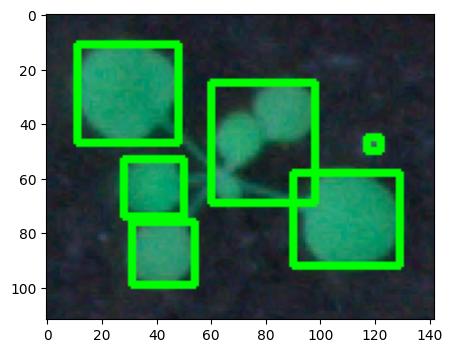

In [73]:
x = (leaf_detection_and_counting(("plant image dataset/Plant/plant001_rgb.png")))
plt.figure(figsize=(5, 5))
plt.imshow(x[0])
plt.show()

## Loading Dataset from CSV

In [74]:
leaf_counts_df = pd.read_csv("leaf_counts.csv")
leaf_counts_df.head(3)

file  count
0  plant001      7
1  plant002      7
2  plant003      8

In [75]:
# making a dictionary of leaf count
leaf_counts_ = dict(zip(leaf_counts_df["file"], leaf_counts_df["count"]))
# leaf_counts_

## Applying All Functions
Now, the three functions developed above, i.e., `plant_segmentation()`, `calculate_dice_score()` and `leaf_detection_and_counting()` will be applied to all images in directory. Each function will be applied to each image by looping through all images in directory.

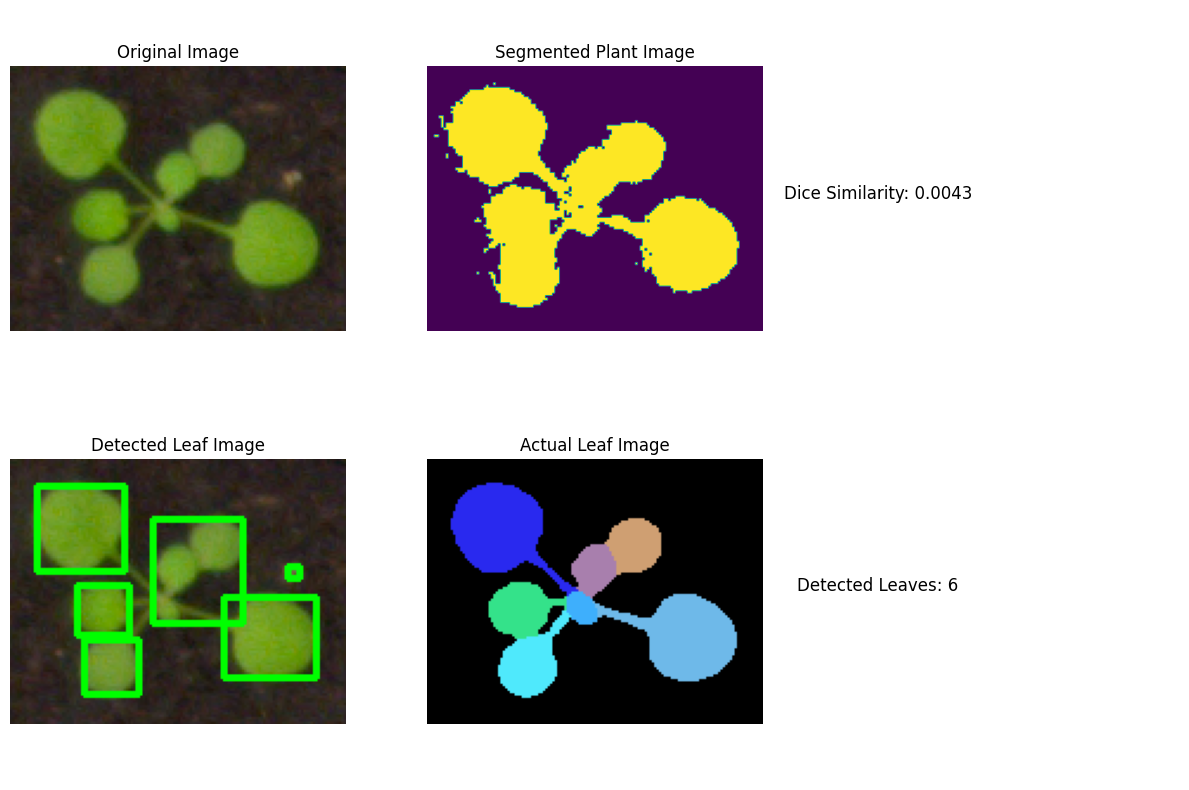

Plant 1: Dice Score = 0.0043, Detected Leaves = 6, Actual Leaves = 7


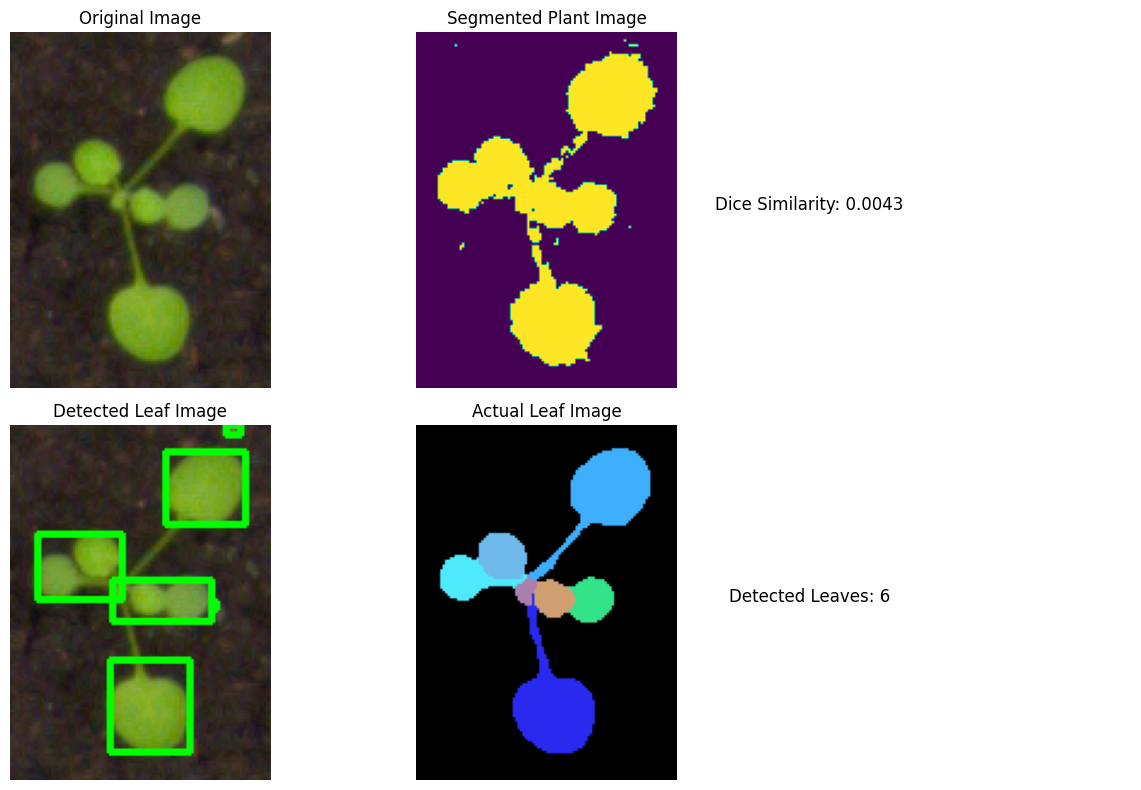

Plant 2: Dice Score = 0.0043, Detected Leaves = 6, Actual Leaves = 7


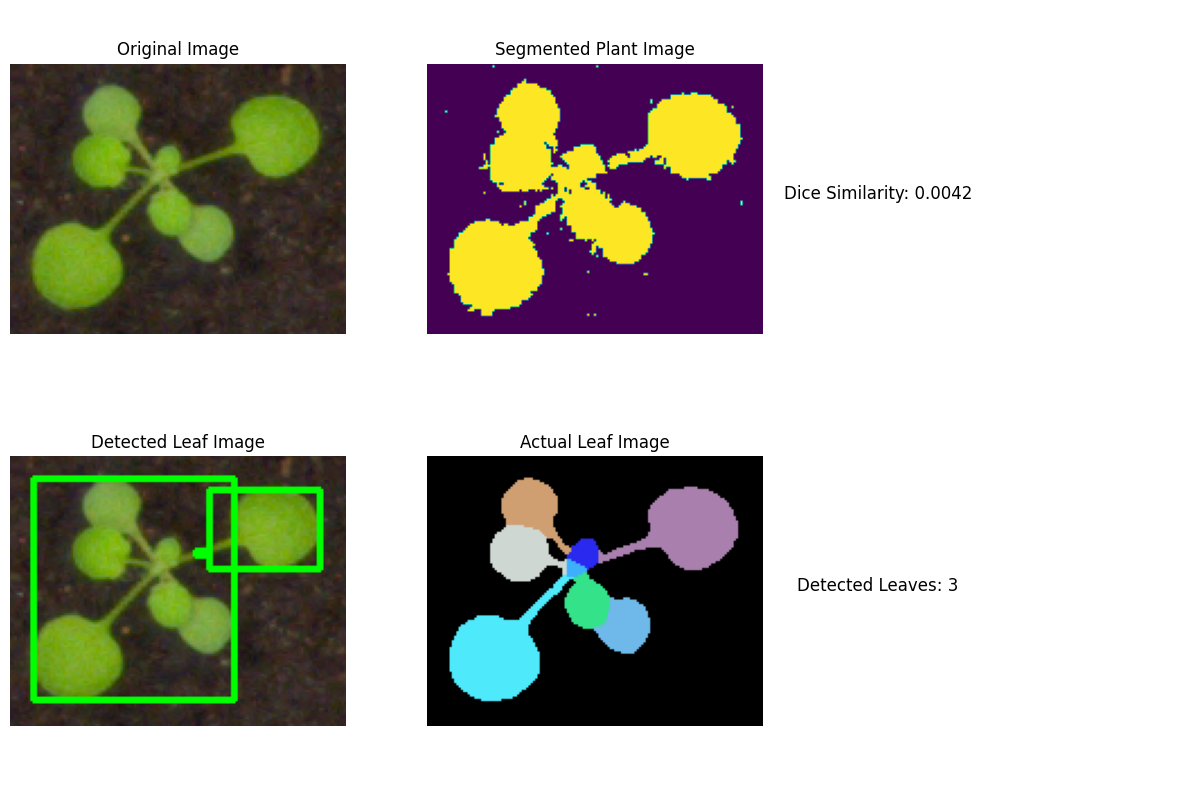

Plant 3: Dice Score = 0.0042, Detected Leaves = 3, Actual Leaves = 8


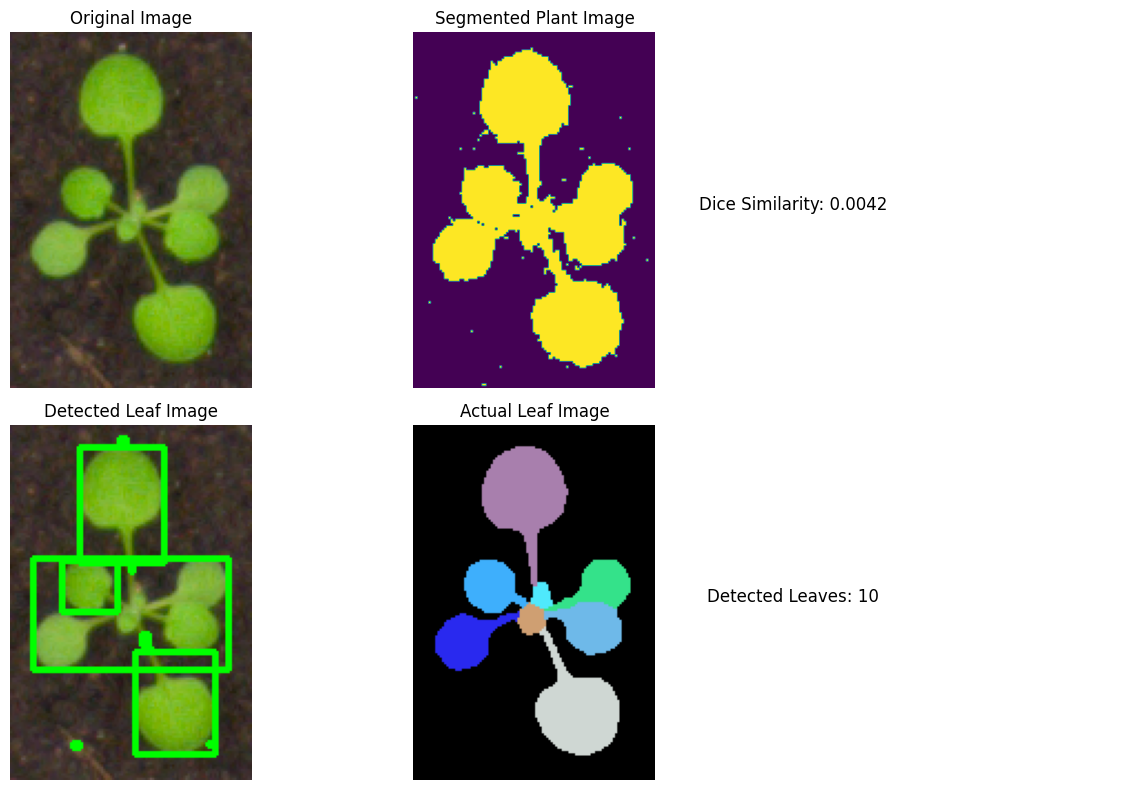

Plant 4: Dice Score = 0.0042, Detected Leaves = 10, Actual Leaves = 8


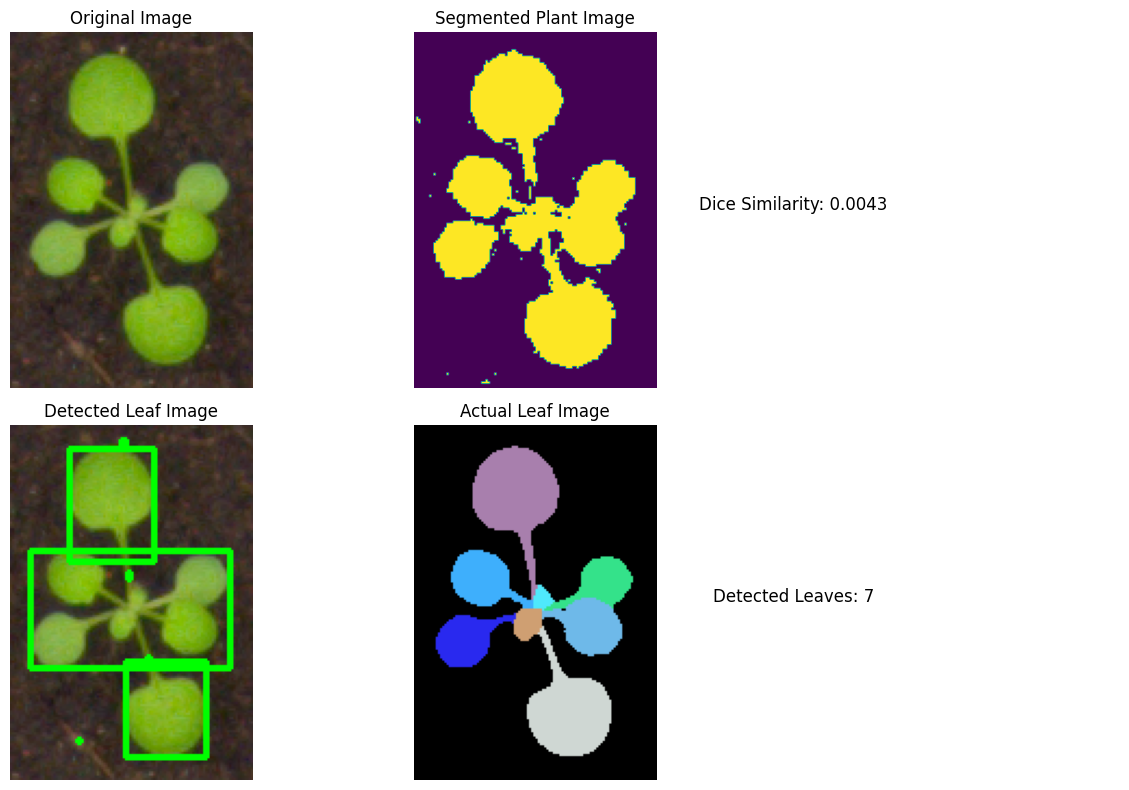

Plant 5: Dice Score = 0.0043, Detected Leaves = 7, Actual Leaves = 8


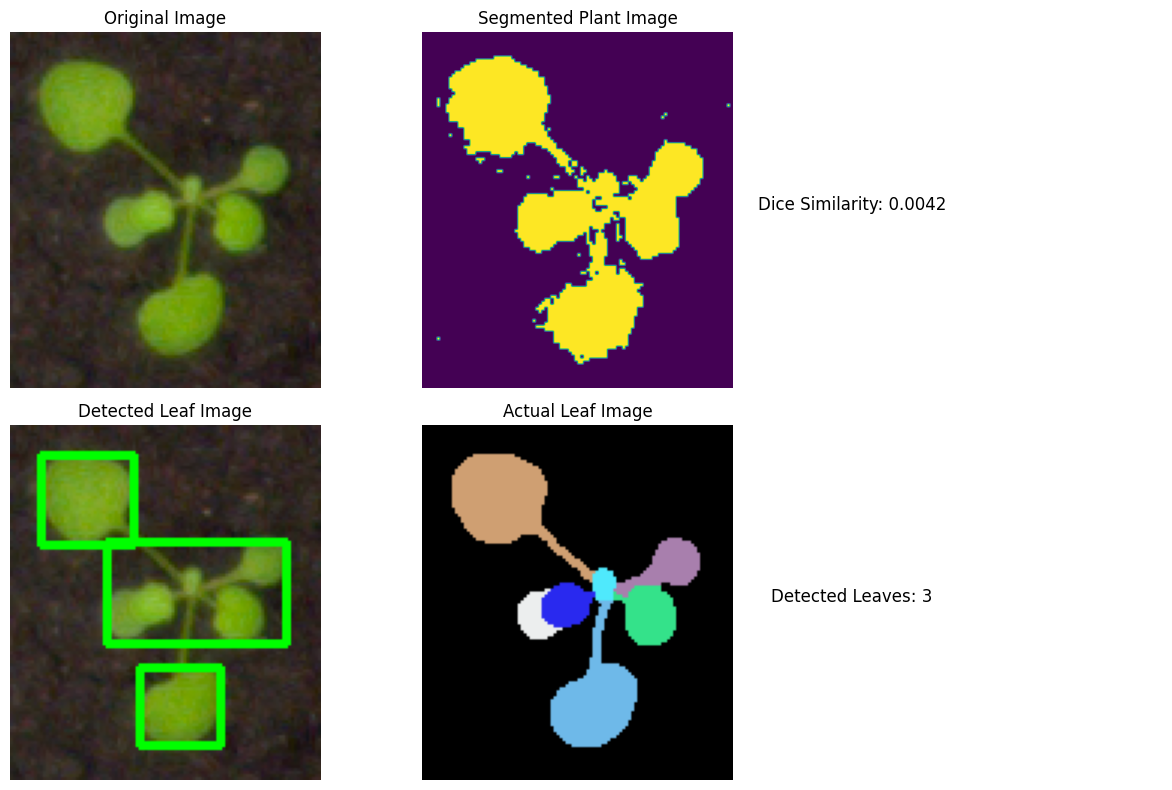

Plant 6: Dice Score = 0.0042, Detected Leaves = 3, Actual Leaves = 7


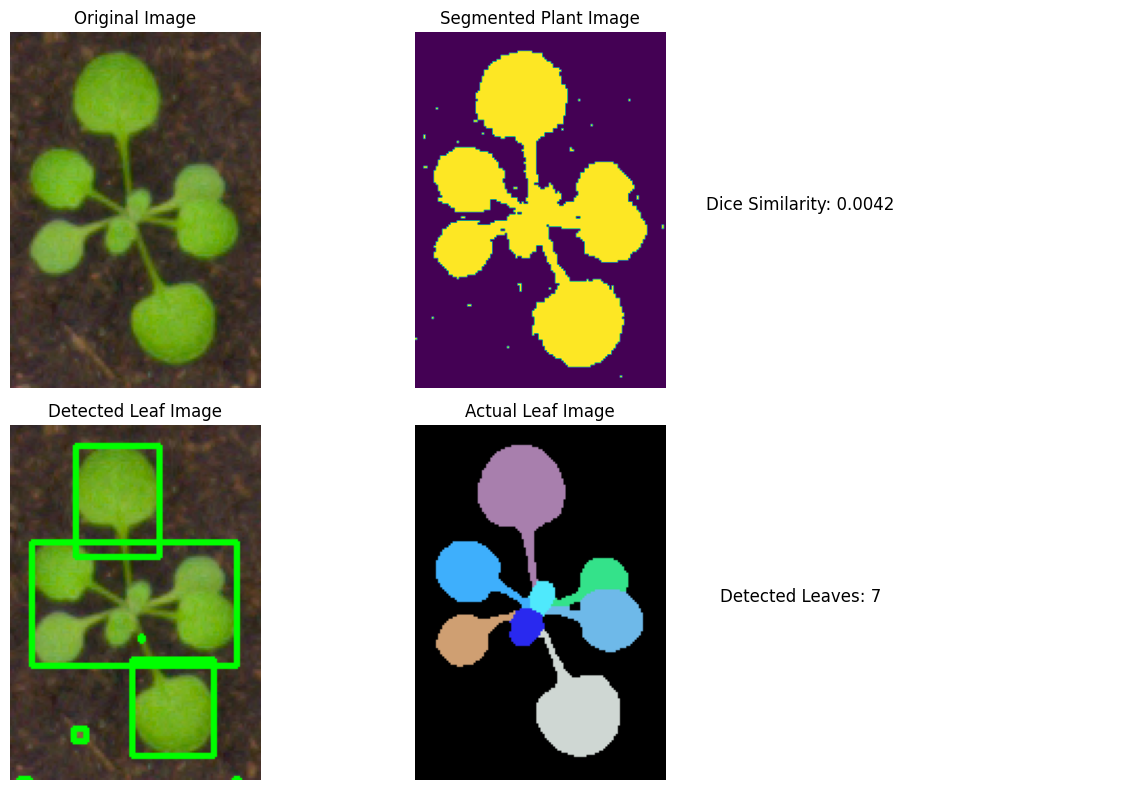

Plant 7: Dice Score = 0.0042, Detected Leaves = 7, Actual Leaves = 8


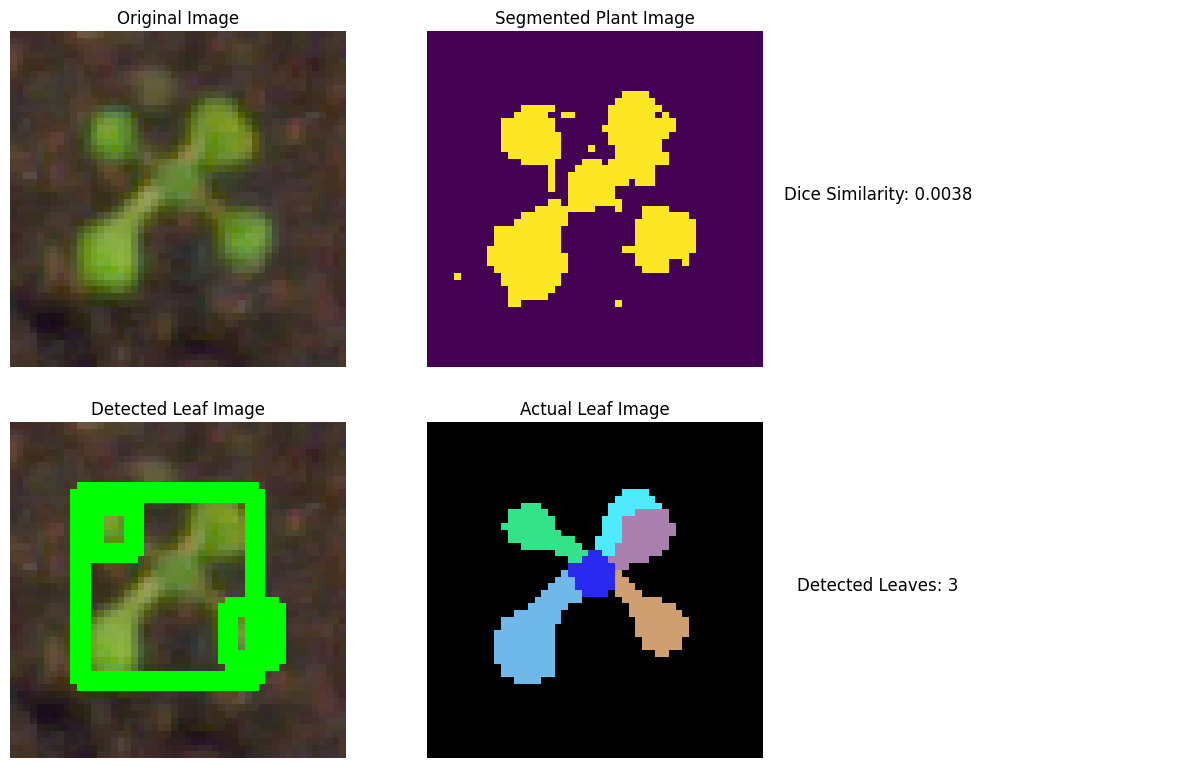

Plant 8: Dice Score = 0.0038, Detected Leaves = 3, Actual Leaves = 6


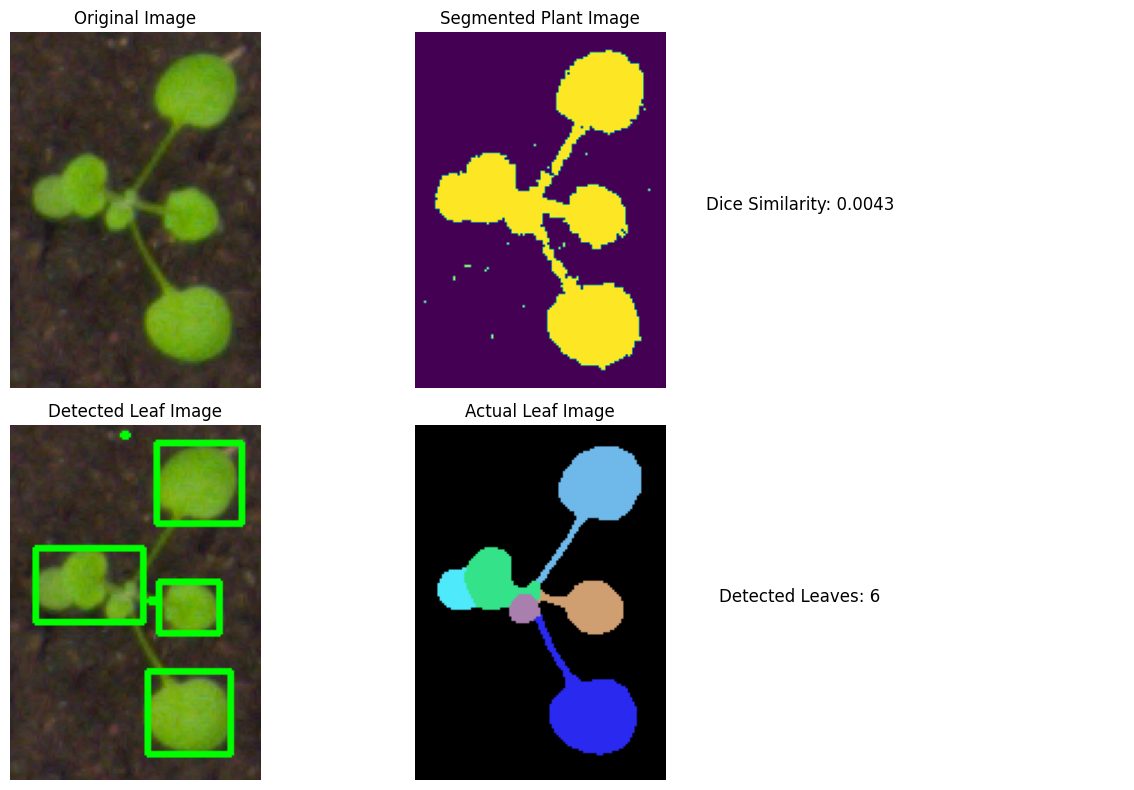

Plant 9: Dice Score = 0.0043, Detected Leaves = 6, Actual Leaves = 6


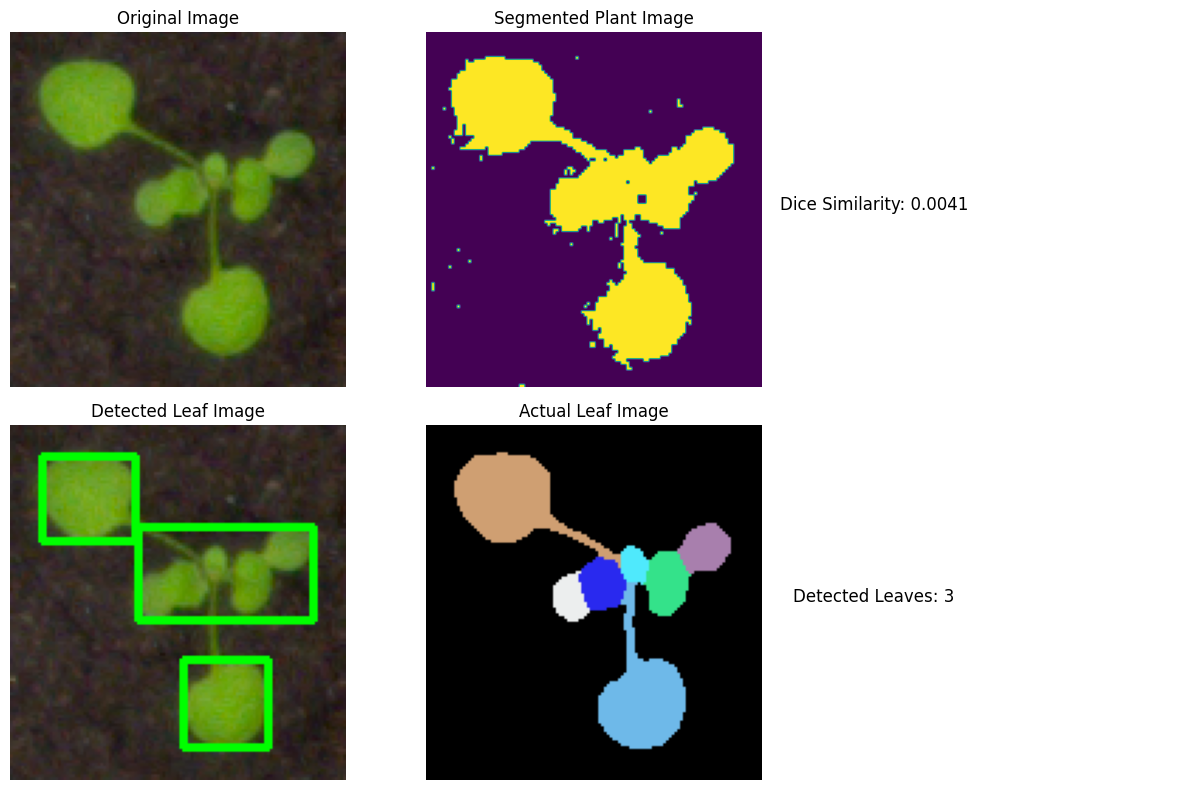

Plant 10: Dice Score = 0.0041, Detected Leaves = 3, Actual Leaves = 7


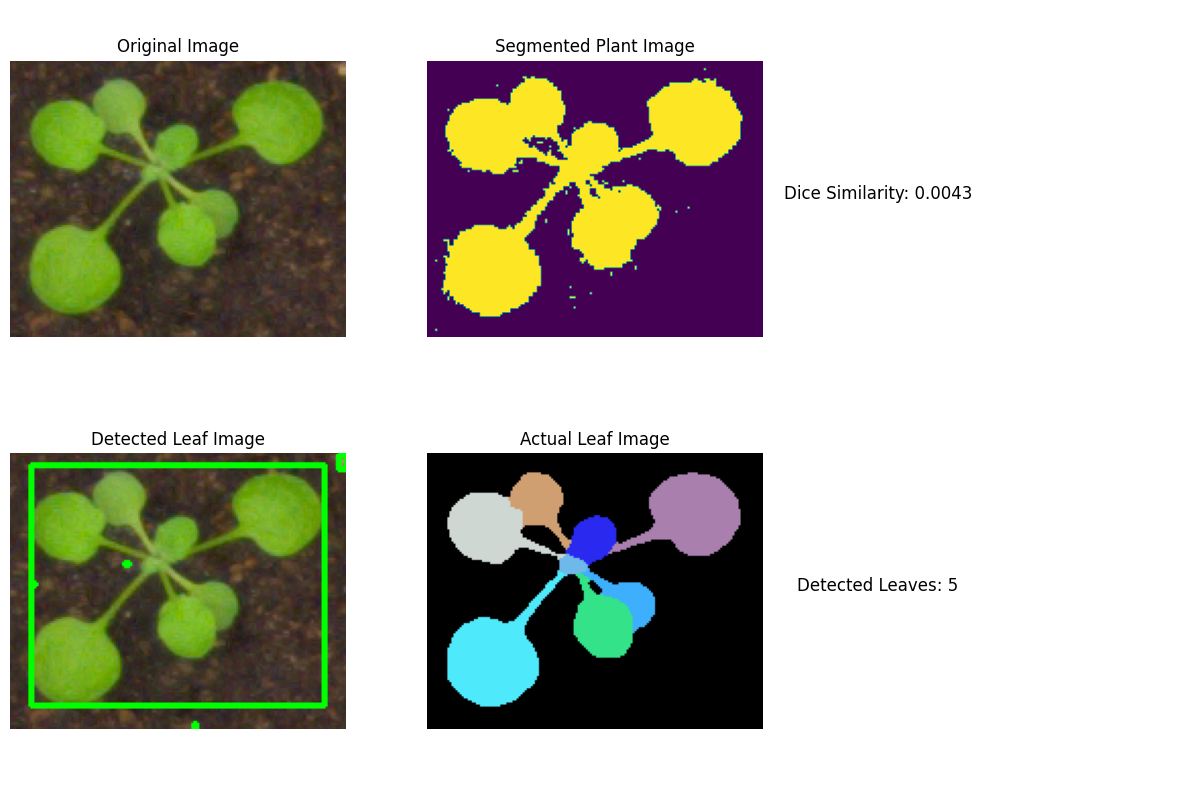

Plant 11: Dice Score = 0.0043, Detected Leaves = 5, Actual Leaves = 8


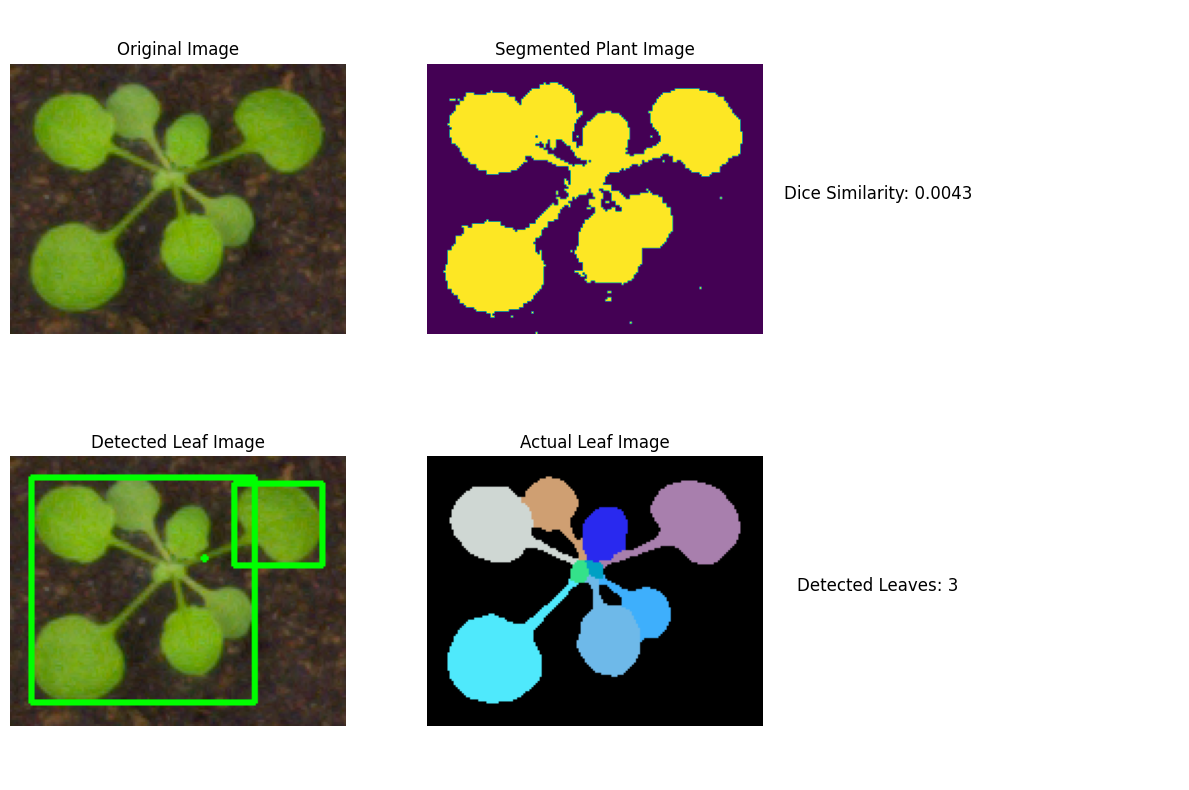

Plant 12: Dice Score = 0.0043, Detected Leaves = 3, Actual Leaves = 9


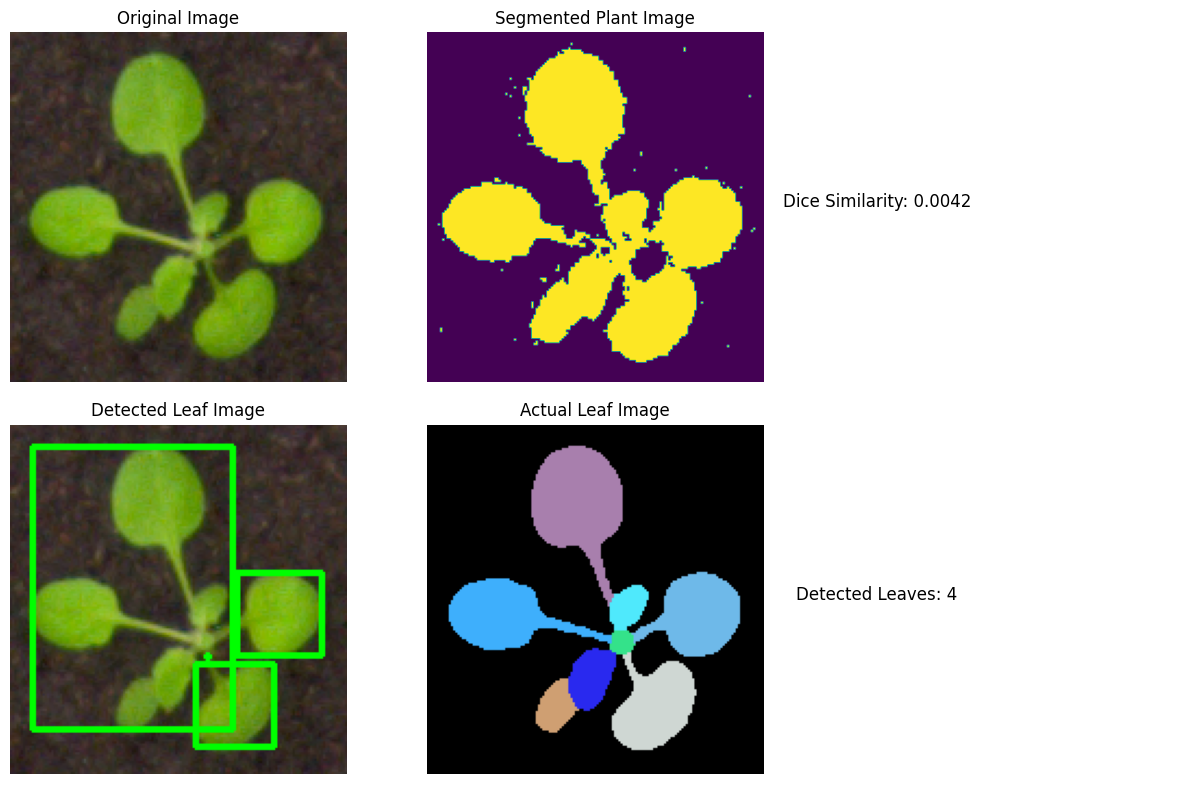

Plant 13: Dice Score = 0.0042, Detected Leaves = 4, Actual Leaves = 8


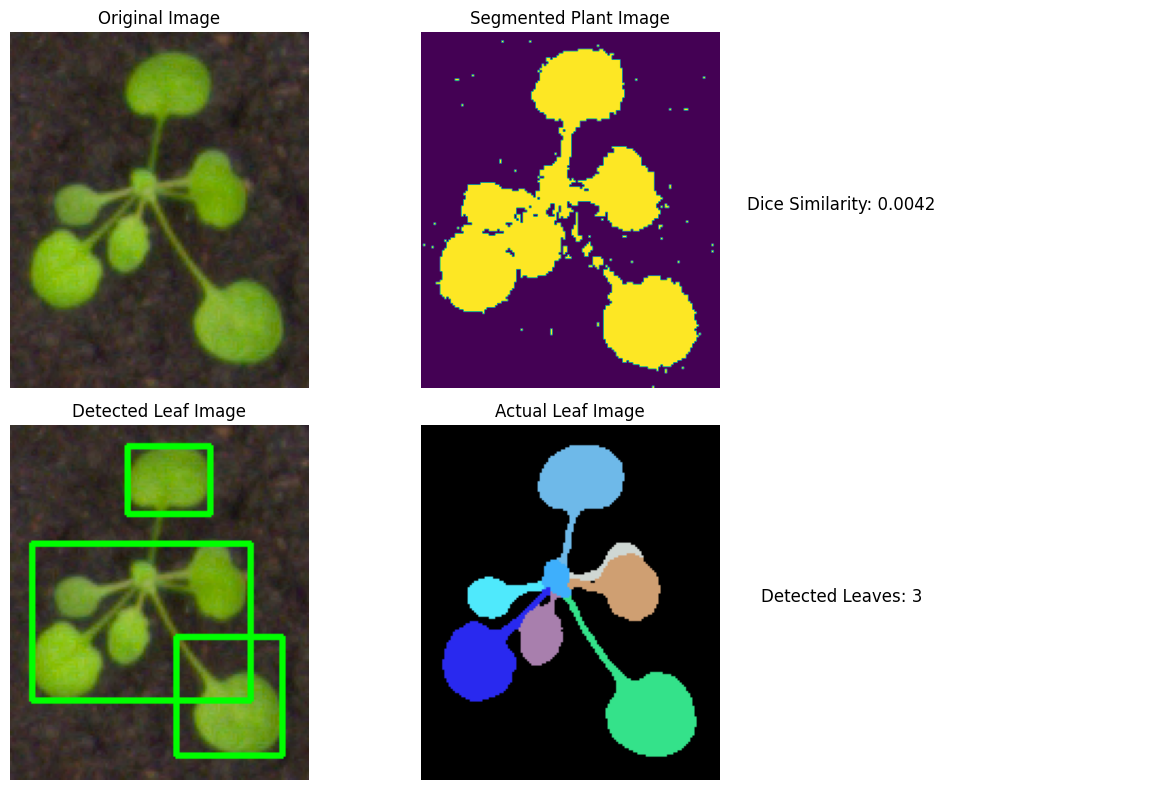

Plant 14: Dice Score = 0.0042, Detected Leaves = 3, Actual Leaves = 8


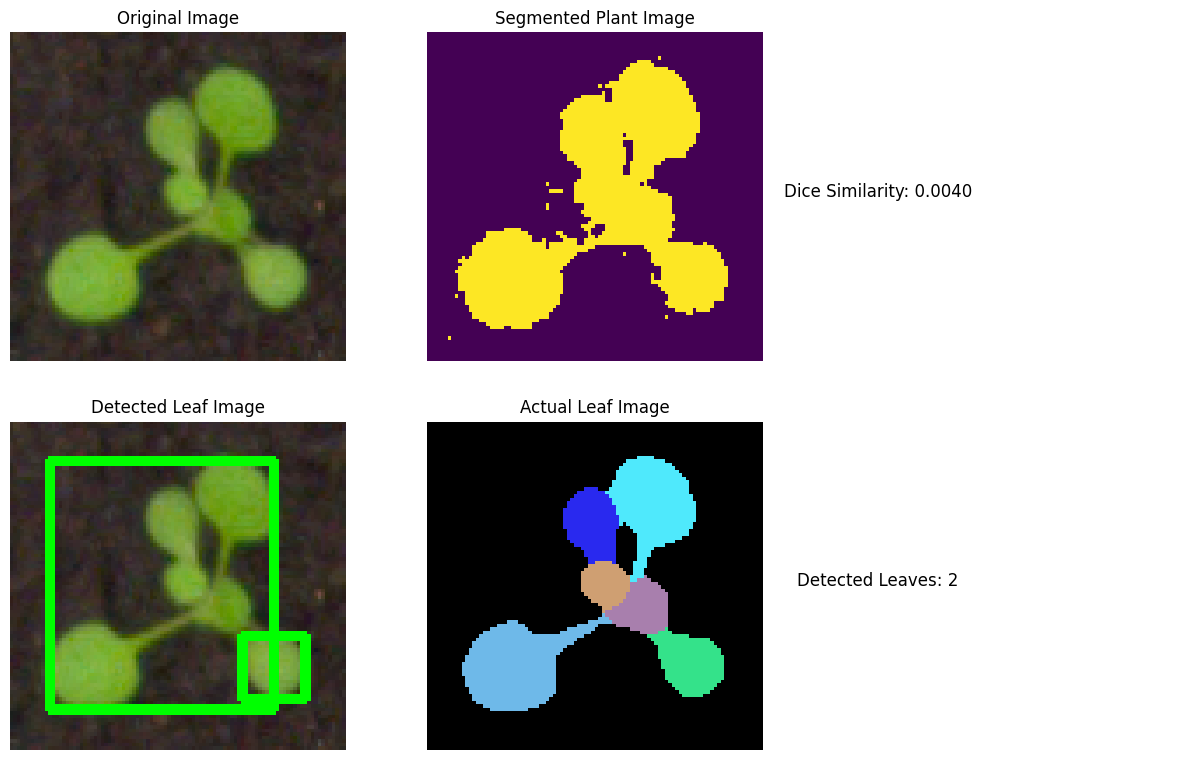

Plant 15: Dice Score = 0.0040, Detected Leaves = 2, Actual Leaves = 6


<Figure size 640x480 with 0 Axes>

In [126]:
# lists to store calculated values
dice_scores = []
leaf_count_differences = []

# processing images and generating the required outputs
for i in range(1, 16):
    image_name = f"plant{str(i).zfill(3)}"
    image_path = os.path.join("plant image dataset", "Plant", f"{image_name}_rgb.png")
    ground_truth_path = os.path.join("plant image dataset", "Ground Truth", f"{image_name}_label.png")
        
    # Applying task a: Plant segmentation
    segmented_plant = plant_segmentation(image_path)
    
    # Task b: Segmentation evaluation
    ground_truth_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate dice score and append to list
    dice_similarity = calculate_dice_similarity(segmented_plant, ground_truth_mask)
    dice_scores.append(dice_similarity)
    
    # Task b: Leaf detection
    leaf_detection_result, detected_leaf_count = leaf_detection_and_counting(image_path)
    
    # Calculate leaf count difference and append to list
    actual_leaf_count = leaf_counts_[image_name]
    leaf_count_difference = np.abs(actual_leaf_count - detected_leaf_count)
    leaf_count_differences.append(leaf_count_difference)
    
    # display and saving results
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 2)
    plt.imshow(segmented_plant)
    plt.title("Segmented Plant Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 3)
    plt.text(0.1, 0.5, f"Dice Similarity: {dice_similarity:.4f}", fontsize=12, ha="center")
    plt.axis("off")
    
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(leaf_detection_result, cv2.COLOR_BGR2RGB))
    plt.title("Detected Leaf Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.imread(ground_truth_path, cv2.IMREAD_COLOR))
    plt.title("Actual Leaf Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 6)
    plt.text(0.1, 0.5, f"Detected Leaves: {detected_leaf_count}", fontsize=12, ha="center")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    
    print(f"Plant {i}: Dice Score = {dice_similarity:.4f}, Detected Leaves = {detected_leaf_count}, Actual Leaves = {actual_leaf_count}")

plt.tight_layout()
plt.show()

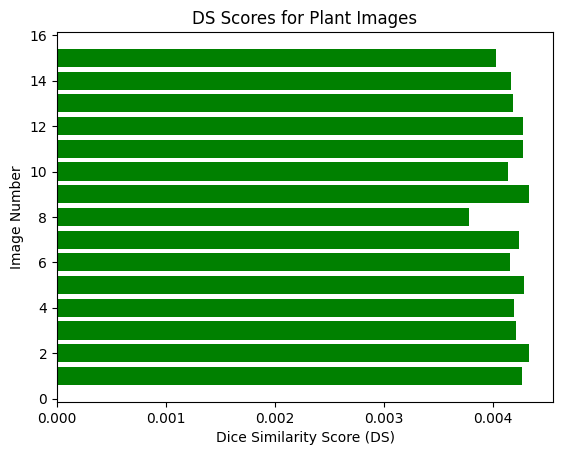

Mean DS: 0.004190
Mean Leaf Count Difference: 2.933


In [127]:
# calculating mean DS and mean leaf count difference
mean_ds = np.mean(dice_scores)
mean_leaf_count_diff = np.mean(leaf_count_differences)

# Plot bar graph for DS scores
plt.barh(range(1, 16), dice_scores, color='g')
plt.xlabel("Dice Similarity Score (DS)")
plt.ylabel("Image Number")
plt.title("DS Scores for Plant Images")
plt.show()

# displaying mean DS and mean leaf count difference
print("Mean DS: %.6f" % mean_ds)
print("Mean Leaf Count Difference: %.3f" % mean_leaf_count_diff)

## Seperately Dealing `plant_002` & `plant_005`

In [121]:
# select plant images
selected_plant_images = ["plant002", "plant005"]

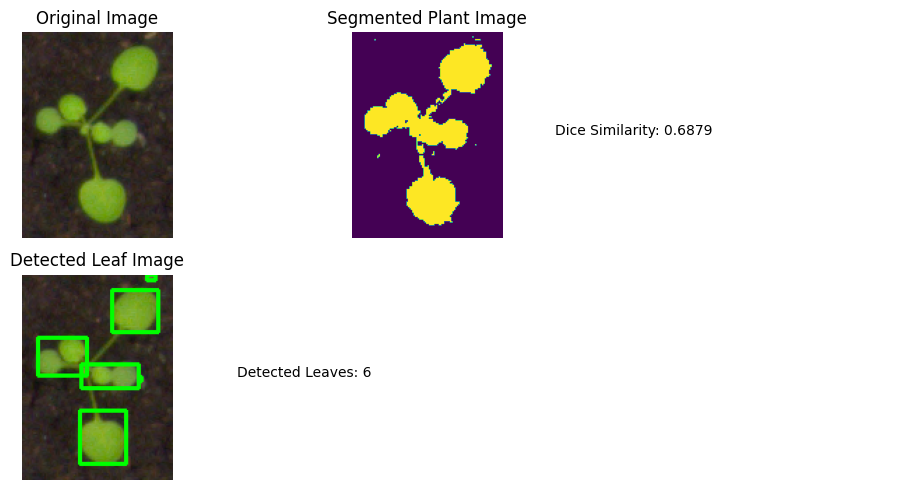

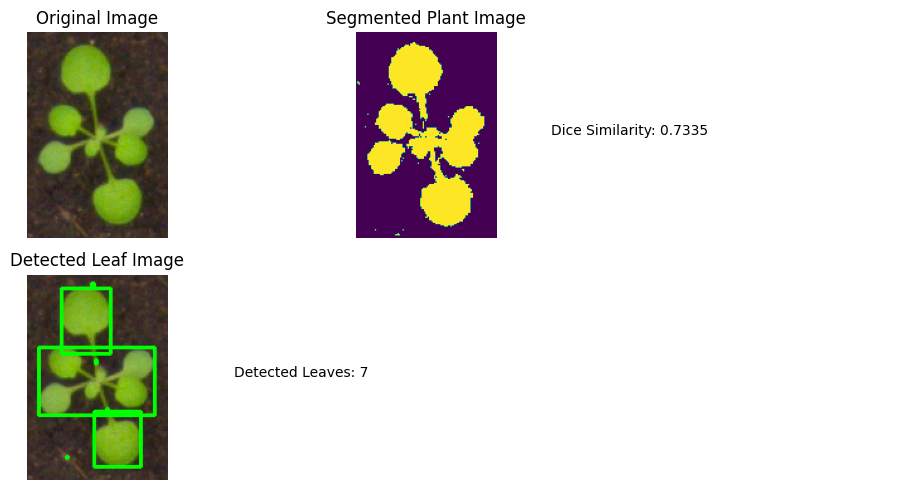

In [122]:
for image_name in selected_plant_images:
    image_path = os.path.join("plant image dataset", "Plant", f"{image_name}_rgb.png")
    ground_truth_path = os.path.join("plant image dataset", "Ground Truth", f"{image_name}_label.png")
    
    binary_segmented_mask = plant_segmentation(image_path)
    
    ground_truth_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    dice_similarity = dice_similarity_score(binary_segmented_mask, ground_truth_mask)
    
    leaf_detection_result, leaf_count = leaf_detection_and_counting(image_path)
    
    plt.figure(figsize=(10, 5))
    # plt.title("Seperate Plot for Plant 002 & Plant 005")
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 2)
    plt.imshow(binary_segmented_mask)
    plt.title("Segmented Plant Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 3)
    plt.text(0.1, 0.5, f"Dice Similarity: {dice_similarity:.4f}", fontsize=10, ha="center")
    plt.axis("off")
    
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(leaf_detection_result, cv2.COLOR_BGR2RGB))
    plt.title("Detected Leaf Image")
    plt.axis("off")
    
    plt.subplot(2, 3, 5)
    plt.text(0.1, 0.5, f"Detected Leaves: {leaf_count}", fontsize=10, ha="center")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()